In [18]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
# Make the graphs a bit prettier, and bigger
plt.rcParams['figure.figsize'] = (15, 5)

### Installing NLTK toolkit

Before starting let's install the NLTK library (http://www.nltk.org/), by typing the following commands in vagrant terminal.

* Install Numpy: `sudo -H pip3 install -U numpy`
* Install NLTK: `sudo -H pip3 install -U nltk`
* Install Tkinter: `sudo -H apt-get -y install python3-tk`

Test that the library is installed properly by executing the following command:

Once the NLTK toolkit is installed, we need to install the NLTK data: 

`sudo python -m nltk.downloader -d /usr/share/nltk_data all`

In [19]:
!sudo python3 -m nltk.downloader -d /usr/share/nltk_data all

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /usr/share/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to
[nltk_data]    |     /usr/share/nltk_data

#### Extra NLTK resources

NLTK also comes with some of the files from Project Gutenberg already included:

In [20]:
import nltk

In [22]:
print(nltk.corpus.gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [23]:
alice  = nltk.corpus.gutenberg.words('carroll-alice.txt')
len(alice)

34110

In [7]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [25]:
len(text4)

145735

In [26]:
list(text4)

['Fellow',
 '-',
 'Citizens',
 'of',
 'the',
 'Senate',
 'and',
 'of',
 'the',
 'House',
 'of',
 'Representatives',
 ':',
 'Among',
 'the',
 'vicissitudes',
 'incident',
 'to',
 'life',
 'no',
 'event',
 'could',
 'have',
 'filled',
 'me',
 'with',
 'greater',
 'anxieties',
 'than',
 'that',
 'of',
 'which',
 'the',
 'notification',
 'was',
 'transmitted',
 'by',
 'your',
 'order',
 ',',
 'and',
 'received',
 'on',
 'the',
 '14th',
 'day',
 'of',
 'the',
 'present',
 'month',
 '.',
 'On',
 'the',
 'one',
 'hand',
 ',',
 'I',
 'was',
 'summoned',
 'by',
 'my',
 'Country',
 ',',
 'whose',
 'voice',
 'I',
 'can',
 'never',
 'hear',
 'but',
 'with',
 'veneration',
 'and',
 'love',
 ',',
 'from',
 'a',
 'retreat',
 'which',
 'I',
 'had',
 'chosen',
 'with',
 'the',
 'fondest',
 'predilection',
 ',',
 'and',
 ',',
 'in',
 'my',
 'flattering',
 'hopes',
 ',',
 'with',
 'an',
 'immutable',
 'decision',
 ',',
 'as',
 'the',
 'asylum',
 'of',
 'my',
 'declining',
 'years',
 '--',
 'a',
 'retreat

It is one thing to automatically detect that a particular word occurs in a text, and to display some words that appear in the same context. However, we can also determine the location of a word in the text: how many words from the beginning it appears. This positional information can be displayed using a dispersion plot. Each stripe represents an instance of a word, and each row represents the entire text. You can produce this plot as shown below. You might like to try more words (e.g., liberty, constitution), and different texts. Can you predict the dispersion of a word before you view it? 

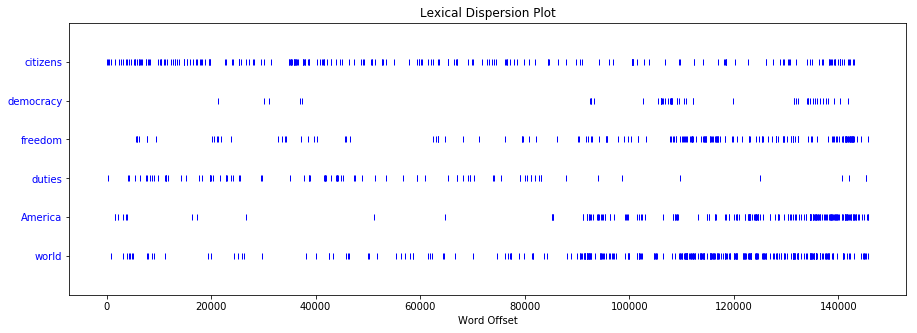

In [27]:
# Text4 is the inauguration addresses
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America", "world"])

#### Exercise

* Pick your own book and create a dispersion plot for your keywords of choice.

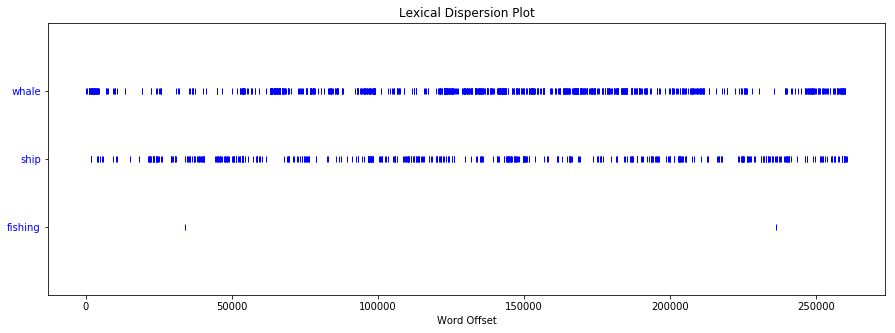

In [43]:
# Your code here
text1.dispersion_plot(['whale', 'ship'])

### Processing Text: Introduction 

Let's start by fetching a piece of text. We will go to [Project Gutenberg](https://www.gutenberg.org/) and fetch the text for "The origin of species"

In [44]:
import requests

# The origin of species
# Original at http://www.gutenberg.org/cache/epub/1228/pg1228.txt but there seems to be 
# some problem with downloading from Amazon EC2
# url = "http://www.gutenberg.org/cache/epub/1228/pg1228.txt"
url = "https://dl.dropboxusercontent.com/u/16006464/DwD_Winter2015/1228.txt"

# Get the URL, do not check the SSL certificate
resp = requests.get(url)

# Get the text
content = resp.text


In [45]:
# The text contains template stuff at the beginning and end. Let's get rid of these
start_phrase = "*** START OF THIS PROJECT GUTENBERG EBOOK ON THE ORIGIN OF SPECIES ***"
end_phrase = "*** END OF THIS PROJECT GUTENBERG EBOOK ON THE ORIGIN OF SPECIES ***"
s = content.index(start_phrase)
e = content.index(end_phrase)
true_content = content[s+len(start_phrase):e]

# Approximate bytes of text
print(len(true_content))

951128


### Frequency distributions, Zipf's law

Now, we have our first text ready to be analyzed. Let's first do some analysis of the words that appear in this classic text:

In [48]:
tokens = true_content.split()

# The nltk.Text object will offer us many useful functions for text analysis
text = nltk.Text(tokens)

# Frequency analysis for words of interest
fdist = text.vocab()

# Number of unique and total words in the text
print(fdist)

<FreqDist with 13908 samples and 155443 outcomes>


Let's take a look at the frequencies of some words in the text:

In [51]:
print(fdist["species"])
print(fdist["sexual"])
print(fdist["origin"])

894
42
30


Let's take a look at the actual words of the text:

In [52]:
fdist

FreqDist({'reverse,': 2,
          'plains.': 1,
          'granite': 1,
          'community.': 1,
          'Eggs': 1,
          'inclined': 16,
          'dog.': 2,
          'eastern': 10,
          'was': 156,
          'nevertheless': 9,
          'Huber,': 4,
          'webbed,': 1,
          'injury': 3,
          'young': 74,
          'individual': 71,
          'take,': 2,
          'that': 1999,
          'checking': 5,
          'recording': 1,
          'therefore': 22,
          'enlarged,': 2,
          'distinctive': 2,
          'rarity': 11,
          'variety;': 2,
          'healthy,': 2,
          'reached': 4,
          'pleasing': 1,
          'breed': 47,
          'beaks,': 3,
          'often': 194,
          'greyhound': 4,
          'could,': 2,
          'intertropical': 8,
          'pause': 1,
          'Malthus': 1,
          'keep': 13,
          'Existence': 6,
          'delicately': 2,
          'rock-pigeon;': 4,
          'region:': 1,
          '

OK, let's see a few more words

In [53]:
print(fdist.most_common(50))

[('the', 9808), ('of', 7559), ('and', 4286), ('in', 3735), ('to', 3546), ('a', 2357), ('that', 1999), ('have', 1741), ('be', 1623), ('as', 1449), ('on', 1360), ('by', 1326), ('is', 1315), ('which', 1189), ('or', 1151), ('are', 1109), ('from', 1102), ('for', 1028), ('I', 968), ('with', 960), ('we', 932), ('been', 926), ('species', 894), ('it', 835), ('not', 833), ('this', 816), ('same', 769), ('will', 713), ('their', 708), ('at', 665), ('some', 616), ('other', 611), ('has', 601), ('one', 597), ('but', 586), ('more', 567), ('each', 536), ('they', 530), ('all', 518), ('any', 504), ('can', 496), ('an', 493), ('may', 491), ('would', 472), ('these', 434), ('so', 432), ('many', 427), ('its', 407), ('The', 404), ('very', 397)]


Hm, that is not very useful. These are all words that are needed by every single English text. Only the world "species" seems to have some meaning. The rest of the words tell us nothing about the text; they're just English "plumbing."

What proportion of the text is taken up with such words? We can generate a cumulative frequency plot for these words:


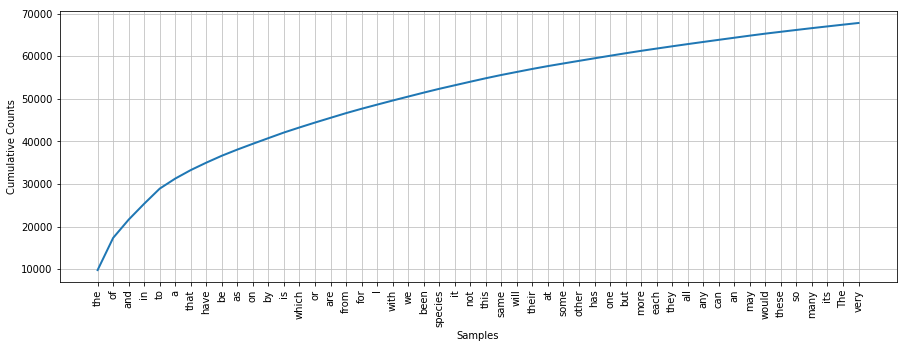

In [54]:
fdist.plot(50, cumulative=True)

These 50 words account for nearly half the book! (If you rememeber, we had 155443 words in the book)

If the frequent words don't help us, how about the words that occur once only, the so-called hapaxes? View them by typing `fdist.hapaxes()`: 

In [55]:
fdist.hapaxes()

['plains.',
 'granite',
 'Eggs',
 'webbed,',
 'bulb',
 'recording',
 'rock,',
 'action;',
 'pleasing',
 'Until',
 'pause',
 'Malthus',
 'ill-fitted',
 'deviate',
 "Hooker's",
 'antennae.',
 'tortoise-shell',
 'quadrupeds,',
 'bad,',
 'pubescence',
 'horn-like',
 'persecuted',
 'indisputable',
 'excrete.',
 'escarpments',
 'survivors,',
 'illustration.',
 'fusca),',
 'monstrosity.',
 'reaction,',
 'Wading',
 'smallest',
 'EXTRAORDINARY',
 'soil),',
 'easily,',
 'like,',
 "Pictet's",
 'belts.',
 'phosphatic',
 'tender',
 'Asiatic',
 "Moreton's",
 'geographical,',
 'tracing',
 'canal',
 'ranked.',
 'flower-feeding',
 'dive',
 'Reciprocity',
 'Aberrant',
 'describing,',
 'safest.',
 'other--for',
 'purely',
 'species--for',
 '(rock',
 'American,',
 'fashion,--perhaps',
 'resembled',
 'sows',
 'feels',
 'invested',
 'Anagallis,',
 'ruins!',
 'shrew,',
 'Shells:',
 'returned',
 'spherical,',
 'ocelli,',
 'India;',
 "'Nature",
 'animal;',
 'longer;',
 'profit,',
 'Azores',
 'cowslip',
 'Kolre

OK, we have a problem. We generated the words of the text by doing a simple `split()`. So our "words" also contain punctuation, and words with different capitalization are considered difference.

### Normalization and Tokenization

So, in order to to proper analysis we need to remove from the document all the punctuation. However, keeping only alphanumeric characters will break things like `B.Sc.` `N.Y.U.` and so on. The process of properly splitting the document into appropriate basic elements is called `tokenization`.

NLTK gives us a (set of ) function call(s) that can do the tokenization (see also http://www.nltk.org/_modules/nltk/tokenize.html):

In [57]:
example = '''Good bagels cost $2.88 in New York.  
    Hey Prof. Ipeirotis, please buy me two of them.
    
    Thanks.
    
    PS: You have a Ph.D., you can handle this, right?'''

print(nltk.word_tokenize(example))

['Good', 'bagels', 'cost', '$', '2.88', 'in', 'New', 'York', '.', 'Hey', 'Prof.', 'Ipeirotis', ',', 'please', 'buy', 'me', 'two', 'of', 'them', '.', 'Thanks', '.', 'PS', ':', 'You', 'have', 'a', 'Ph.D.', ',', 'you', 'can', 'handle', 'this', ',', 'right', '?']


In [58]:
s1 = "On a $50,000 mortgage of 30 years at 8 percent, the monthly payment would be $366.88."
print(nltk.word_tokenize(s1))

['On', 'a', '$', '50,000', 'mortgage', 'of', '30', 'years', 'at', '8', 'percent', ',', 'the', 'monthly', 'payment', 'would', 'be', '$', '366.88', '.']


In [59]:
s2 = "\"We beat some pretty good teams to get here,\" Slocum said."
print(nltk.word_tokenize(s2))

['``', 'We', 'beat', 'some', 'pretty', 'good', 'teams', 'to', 'get', 'here', ',', "''", 'Slocum', 'said', '.']


In [61]:
s3 = "Well, we couldn't have this predictable, cliche-ridden, \"Touched by an Angel\" (a show creator John Masius worked on) wanna-be if she didn't."
print(nltk.word_tokenize(s3))

['Well', ',', 'we', 'could', "n't", 'have', 'this', 'predictable', ',', 'cliche-ridden', ',', '``', 'Touched', 'by', 'an', 'Angel', "''", '(', 'a', 'show', 'creator', 'John', 'Masius', 'worked', 'on', ')', 'wanna-be', 'if', 'she', 'did', "n't", '.']


In [62]:
s4 = "I cannot cannot work under these conditions!"
print(nltk.word_tokenize(s4))

['I', 'can', 'not', 'can', 'not', 'work', 'under', 'these', 'conditions', '!']


In [63]:
s5 = "The company spent $30,000,000 last year."
print(nltk.word_tokenize(s5))

['The', 'company', 'spent', '$', '30,000,000', 'last', 'year', '.']


In [64]:
s6 = "The company spent 40.75% of its income last year."
print(nltk.word_tokenize(s6))

['The', 'company', 'spent', '40.75', '%', 'of', 'its', 'income', 'last', 'year', '.']


In [65]:
s7 = "He arrived at 3:00 pm."
print(nltk.word_tokenize(s7))

['He', 'arrived', 'at', '3:00', 'pm', '.']


In [66]:
s8 = "I bought these items: books, pencils, and pens."
print(nltk.word_tokenize(s8))

['I', 'bought', 'these', 'items', ':', 'books', ',', 'pencils', ',', 'and', 'pens', '.']


In [67]:
s9 = "Though there were 150, 100 of them were old."
print(nltk.word_tokenize(s9))

['Though', 'there', 'were', '150', ',', '100', 'of', 'them', 'were', 'old', '.']


In [68]:
s10 = "There were 300,000, but that wasn't enough."
print(nltk.word_tokenize(s10))

['There', 'were', '300,000', ',', 'but', 'that', 'was', "n't", 'enough', '.']


So, let's repeat the process now for our original text:

In [69]:
# We tokenize and we also convert to lowercase for further normalization
tokens = nltk.word_tokenize(true_content.lower())
text = nltk.Text(tokens)

# Frequency analysis for words of interest
fdist = text.vocab()

# Number of unique and total words in the text
print(fdist)

<FreqDist with 7687 samples and 175682 outcomes>


We went from `13908 samples and 155443 outcomes` to `7687 samples and 175682 outcomes`. In other words, we have now 7687 unique tokens, and a set of 175682 tokens, as punctuation characters are now separate tokens.

In [70]:
print(fdist.most_common(50))

[(',', 12594), ('the', 10288), ('of', 7851), ('and', 4439), ('.', 4045), ('in', 4016), ('to', 3605), ('a', 2465), ('that', 2083), ('have', 1762), (';', 1701), ('be', 1656), ('as', 1591), ('on', 1553), ('species', 1505), ('is', 1418), ('by', 1357), ('which', 1229), ('or', 1190), ('we', 1157), ('are', 1135), ('from', 1132), ('for', 1123), ('it', 1054), ('with', 999), ('not', 995), ('i', 993), ('this', 961), ('been', 931), ('but', 862), ('same', 792), ('other', 753), ('will', 736), ('their', 713), ('at', 689), ('some', 658), ('one', 643), ('can', 642), ('has', 611), ('more', 579), ('all', 553), ('each', 549), ('they', 541), ('so', 517), ('any', 514), ('may', 509), ('an', 506), ('these', 496), ('would', 489), ('many', 451)]


In [71]:
print(sorted(fdist.hapaxes()))

["'introduction", "'journal", "'nature", "'vestiges", '..13,190.', '..57,154.', '.2,240', '1', '1.41421', '10/100', '100', '1000', '101', '104.', '109.', '110', '1100', '111', '112', '12,000', '134', '135', '139', '14.3', '1400', '143', '143.', '155.', '157.', '16.', '1600', '164.', '17.', '1747', '18/94', '18/98', '181.', '182', '1837', '1854-55', '1858', '1859', '1859.', '186', '187.', '19.', '193', '196.', '197', '1st', '2', '20,000', '200', '203', '203.', '2048', '207.', '209.', '212', '22', '224.', '226.', '228', '23', '23.', '230.', '2300', '233', '233.', '245.', '246.', '247', '251', '252.', '255.', '256.', '260', '263.', '264.', '265.', '268', '268.', '273.', '274.', '275.', '29', '29.', '295', '3/4', '302.', '303', '306,662,400', '307', '309.', '310.', '318.', '319.', '321', '323.', '33', '33.', '334', '335.', '336.', '337.', '34.', '340.', '347.', '355.', '357', '357.', '36', '364.', '366', '366.', '367', '371.', '373', '375', '38.', '382.', '388.', '39', '39.', '398', '40.',

In [72]:
print(len(fdist.hapaxes()))

2666


So out of the 7687 unique words, 2666 of them appear only once in the text. But these are only 2666 out of the total of 175682 words in the text. This is ~1.5% of the text.

#### Sentence splitting

The tokenization process can also work on separating sentences

In [73]:
example = '''Good bagels cost $2.88 in N.Y.C. Hey Prof. Ipeirotis, please buy me two of them.
    
    Thanks.
    
    PS: You have a Ph.D. you can handle this, right?'''

print(nltk.sent_tokenize(example))

['Good bagels cost $2.88 in N.Y.C.', 'Hey Prof. Ipeirotis, please buy me two of them.', 'Thanks.', 'PS: You have a Ph.D. you can handle this, right?']


#### Zipf's Law

Zipf's law says that the frequencies of words in text follow a power-law: A few words account for a big fraction of the text (the very frequent ones, usually just the "plumping" of English), and a large fraction of the unique vocabularly (the "hapaxes") appear very infrequently.

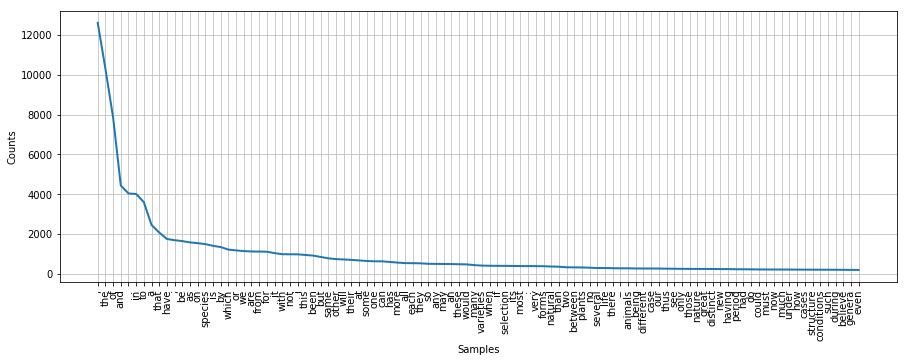

In [74]:
fdist.plot(100, cumulative=False)

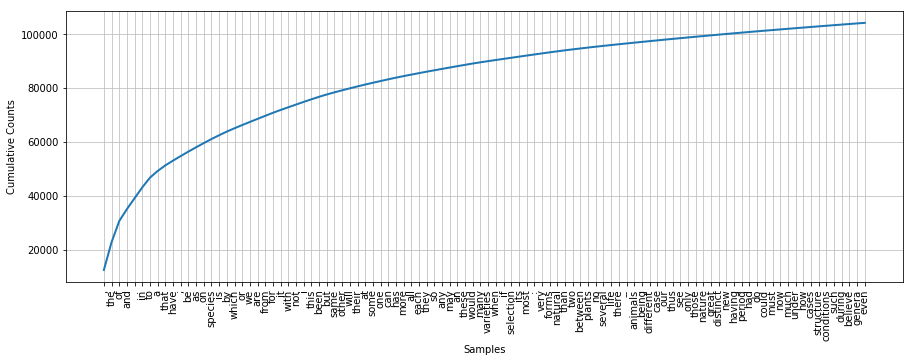

In [75]:
fdist.plot(100, cumulative=True)

#### Normalization: Stopwords

NLTK contains a corpus of stopwords, that is, high-frequency words like `the`, `to` and `also` that we sometimes want to filter out of a document before further processing. Stopwords usually have little lexical content, and their presence in a text fails to distinguish it from other texts.

In [76]:
from nltk.corpus import stopwords

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

Let's define a function to remove the words in a text are in the stopwords list:

In [78]:
mystops = []
mystops.append('one')
mystops.append('may')
mystops.append('would')
mystops.append('many')

def remove_stopwords(text, hapaxes):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w.lower() for w in text 
               if w.lower() not in stopwords # w should not be in NLTK stopwords 
                   and w.lower() not in mystops # w should not be in custom stop word list
                   and w.isalpha() # w should consists of letters, not numbers, not punctuation
                   and w.lower() not in hapaxes # w should have frequency > 1 
              ] 
    return nltk.Text(content)

text_nostopwords = remove_stopwords(text, fdist.hapaxes())
fdist_nostopwords = text_nostopwords.vocab()
print(fdist_nostopwords)

<FreqDist with 4432 samples and 71060 outcomes>


In [79]:
print(fdist_nostopwords.most_common(50))

[('species', 1505), ('varieties', 428), ('selection', 414), ('forms', 397), ('natural', 382), ('two', 343), ('plants', 334), ('several', 306), ('life', 306), ('animals', 292), ('case', 282), ('different', 282), ('thus', 273), ('see', 270), ('nature', 261), ('great', 261), ('distinct', 257), ('new', 253), ('period', 245), ('could', 234), ('must', 233), ('much', 230), ('cases', 225), ('structure', 224), ('conditions', 222), ('believe', 216), ('genera', 213), ('even', 210), ('long', 203), ('number', 202), ('yet', 201), ('often', 200), ('generally', 199), ('first', 198), ('common', 197), ('far', 195), ('time', 195), ('though', 194), ('degree', 191), ('become', 185), ('another', 184), ('characters', 183), ('groups', 178), ('might', 175), ('certain', 174), ('large', 172), ('less', 172), ('view', 168), ('modification', 165), ('instance', 165)]


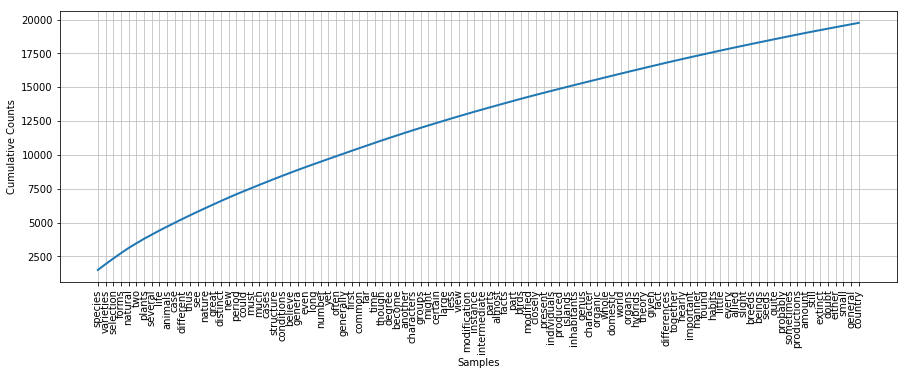

In [80]:
fdist_nostopwords.plot(100, cumulative=True)

#### Normalization: Stemming 

So far, the only normalization that we did is to convert text to lowercase before doing anything with its words, e.g. `set(w.lower() for w in text)`. By using lower(), we have normalized the text to lowercase so that the distinction between `The` and `the` is ignored. Often we want to go further than this, and strip off any affixes, a task known as **stemming**. 

NLTK includes several off-the-shelf stemmers, and if you ever need a stemmer you should use one of these. The Porter stemmer is a very well-known stemmer, and should suffice for most of our applications. 


In [81]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government.  Supreme executive power derives from
a mandate from the masses, not from some farcical aquatic ceremony."""

tok = nltk.word_tokenize(raw)

porter = nltk.PorterStemmer()
stemmed =  [porter.stem(t) for t in tok]

# This idiom concatenates all the words in a list. 
# The call is s.join(list), where we join the element 
# of the list using the string s as the concatenacting character
print(" ".join(stemmed))

denni : listen , strang women lie in pond distribut sword is no basi for a system of govern . suprem execut power deriv from a mandat from the mass , not from some farcic aquat ceremoni .


#### Normalization: Lemmatization

A further step in the normalization process is to make sure that the resulting form is a known word in a dictionary, a task known as **lemmatization**. The WordNet lemmatizer only removes affixes if the resulting word is in its dictionary. This additional checking process makes the lemmatizer slower than the above stemmers. Notice that it doesn't handle lying, but it converts women to woman.

In [82]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government.  Supreme executive power derives from
a mandate from the masses, not from some farcical aquatic ceremony."""
tok = nltk.word_tokenize(raw)

wnl = nltk.WordNetLemmatizer()
lemmatized =  [wnl.lemmatize(t) for t in tok]
print(" ".join(lemmatized))

DENNIS : Listen , strange woman lying in pond distributing sword is no basis for a system of government . Supreme executive power derives from a mandate from the mass , not from some farcical aquatic ceremony .


But what is this WordNet? It is one of the most useful resources for anyone interested in analyzing text at a more semantic level than simply frequency counts

### Some additional, semi-random examples

Below are a few examples of what we can do with the NLTK toolkit, but we will discuss the details of these later in class.

In [ ]:
# Examples of the appearance of the word "selection"
text.concordance("species")

In [ ]:
# Frequent collocations in the text (usually meaningful phrases)
text.collocations()

In [ ]:
# Dispersion plot
text.dispersion_plot(["selection", "species", "organic", "allied", "parent", "sexual"])

### Summary

* A frequency distribution is a collection of items along with their frequency counts (e.g., the words of a text and their frequency of appearance).
* Tokenization is the segmentation of a text into basic units — or tokens — such as words and punctuation. Tokenization based on whitespace is inadequate for many applications because it bundles punctuation together with words. NLTK provides an off-the-shelf tokenizer nltk.word_tokenize().
* Stemming is the process of removing the affix of a word, to create a "normalized" representation of the token
* Lemmatization is a process that maps the various forms of a word (such as appeared, appears) to the canonical or citation form of the word, also known as the lexeme or lemma (e.g. appear). 
* WordNet is a semantically-oriented dictionary of English, consisting of synonym sets — or synsets — and organized into a network.

